In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.multioutput import MultiOutputClassifier

In [3]:
path = r'C:\Users\artoe\Documents\DataAnalytics\Machine Learning with Python\Achievement 1\data'

In [4]:
weatherscaled = pd.read_csv(os.path.join(path, 'weather_scaled.csv'), index_col = False)

In [5]:
weatherscaled.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
weatherscaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [7]:
pleasantweather = pd.read_csv(os.path.join(path, 'Pleasant_Weather.csv'), index_col = False)

In [8]:
pleasantweather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#based on information from task 1.3, the missing columns from the pleasant weather data are Gdansk, Roma and Tours.
#check which weather data is listed for each station

In [10]:
basel_weatherinfo = [col for col in weatherscaled.columns if 'BASEL' in col]

In [11]:
basel_weatherinfo

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [12]:
#creating subset with only relevant columns and weather stations in both data sets
df = weatherscaled[['DATE', 'MONTH', 'BASEL_precipitation','BASEL_sunshine','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',
                    'BELGRADE_precipitation','BELGRADE_sunshine','BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
                    'BUDAPEST_precipitation','BUDAPEST_sunshine','BUDAPEST_temp_mean','BUDAPEST_temp_min','BUDAPEST_temp_max',
                    'DEBILT_precipitation','DEBILT_sunshine','DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
                    'DUSSELDORF_precipitation','DUSSELDORF_sunshine','DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
                    'HEATHROW_precipitation','HEATHROW_sunshine','HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
                    'KASSEL_precipitation','KASSEL_sunshine','KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
                    'LJUBLJANA_precipitation','LJUBLJANA_sunshine','LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
                    'MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
                    'MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
                    'MUNCHENB_precipitation','MUNCHENB_sunshine','MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
                    'OSLO_precipitation','OSLO_sunshine','OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
                    'SONNBLICK_precipitation','SONNBLICK_sunshine','SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',
                    'STOCKHOLM_precipitation','STOCKHOLM_sunshine','STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
                    'VALENTIA_precipitation','VALENTIA_sunshine','VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']]
                    

In [13]:
#create X and y data by dropping date and month columns
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [14]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,30)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 1
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 2
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 3
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 4
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 5
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 6
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 7
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 8
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
i - 9
k - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


<function matplotlib.pyplot.show(close=None, block=None)>

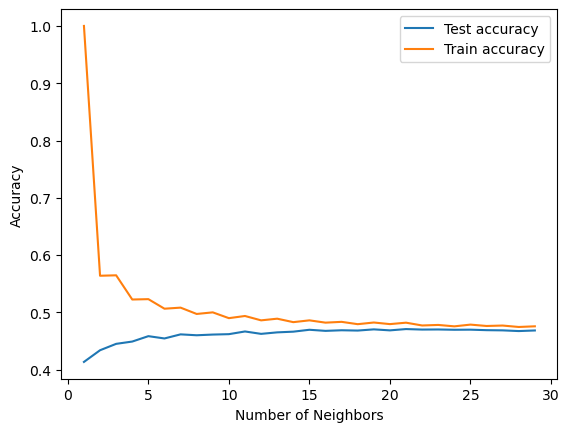

In [16]:
#Plot the relationship between number of neighbors and accuracy.
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

C:\Users\artoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


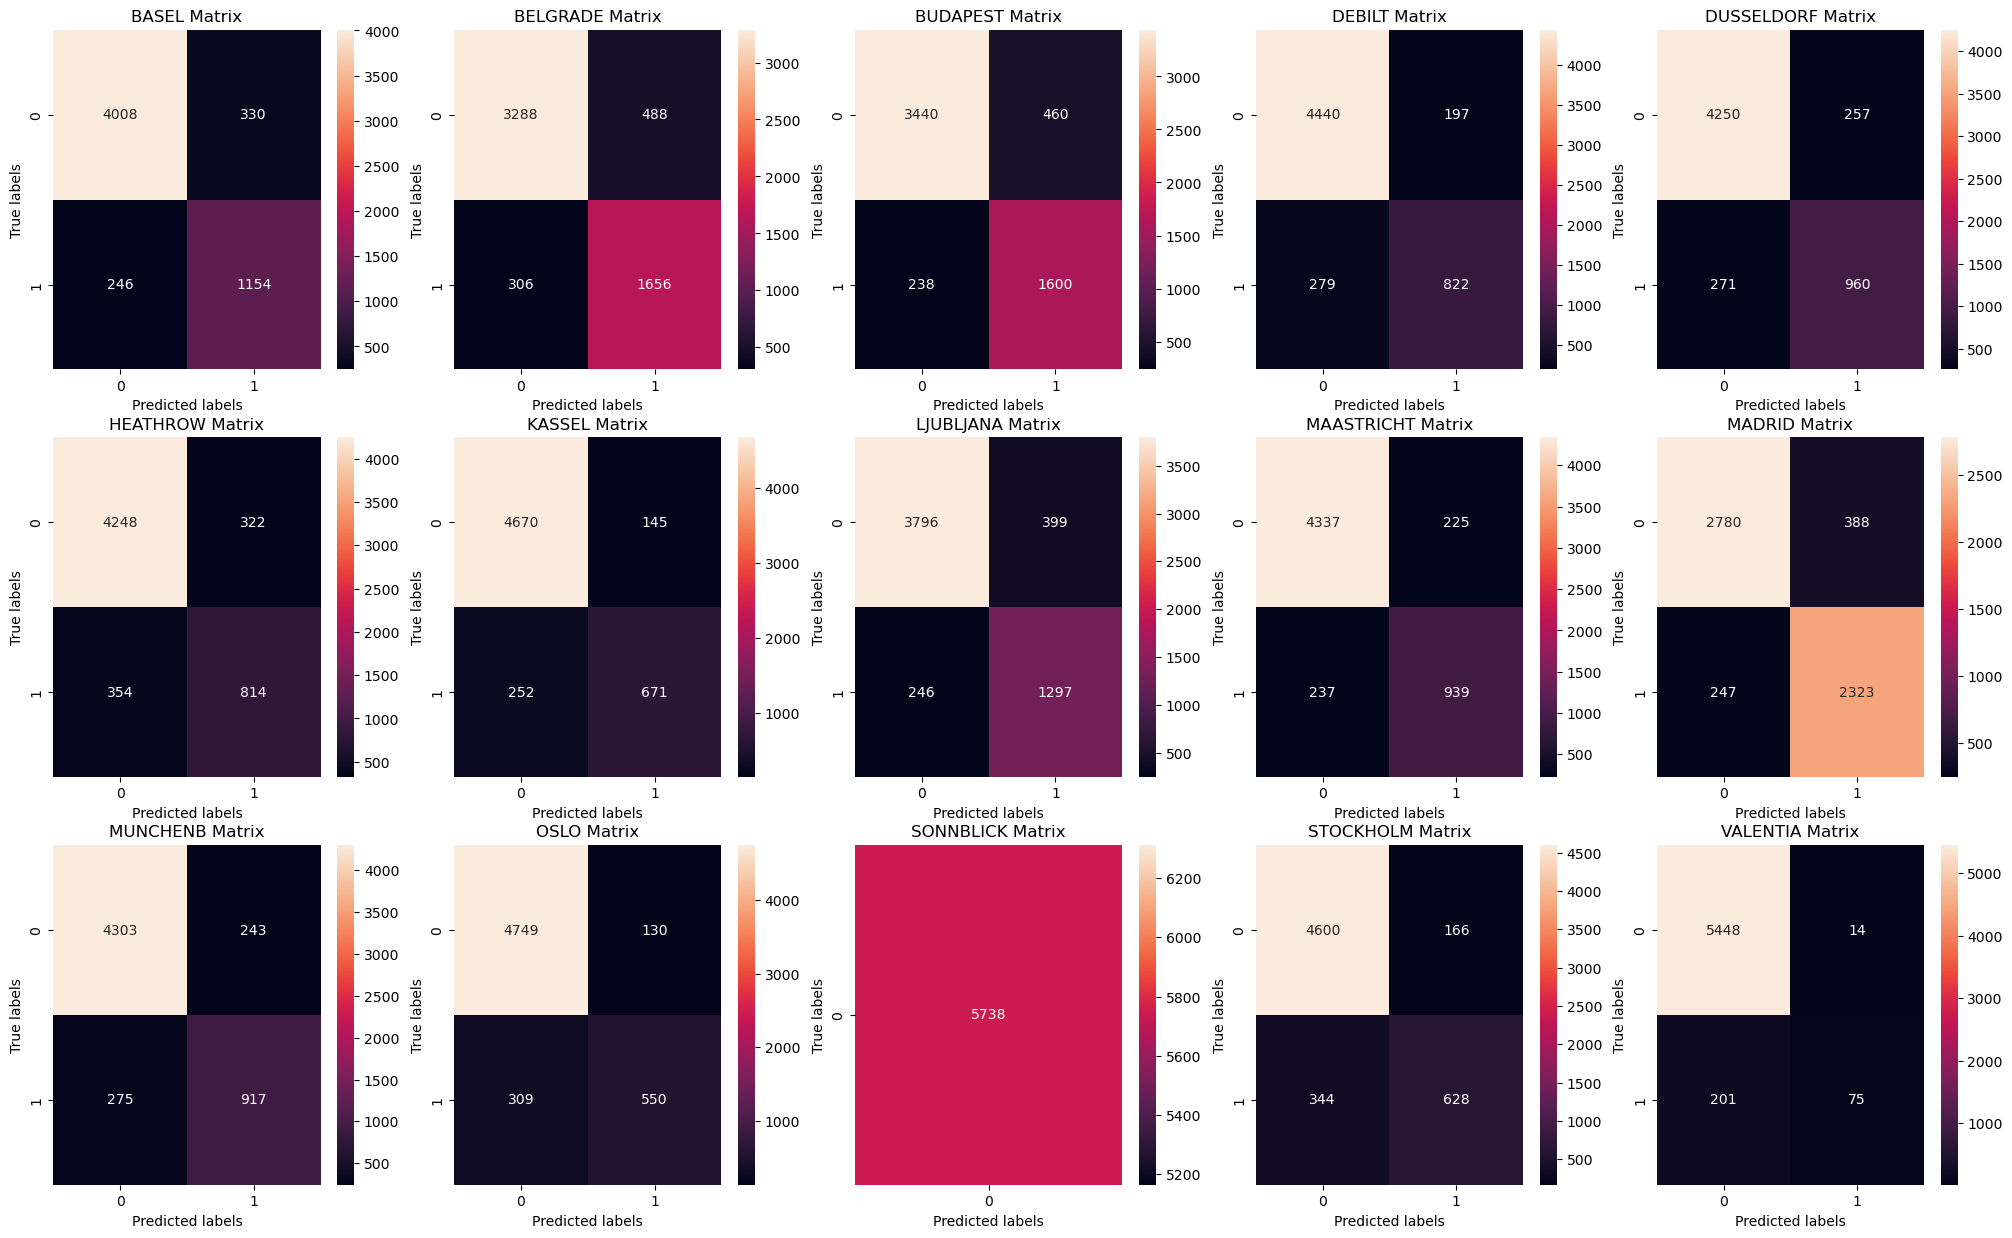

In [17]:
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### Sonnblick shows entirely unpleasant weather predictions with 100% accuracy. Checking the pleasant weather data set to determine the number of pleasant vs unpleasant days for each station

In [19]:
pleasantweather_sum = pleasantweather.sum()

In [20]:
pleasantweather_sum.sort_values(ascending=False)

DATE                           456930730597
MADRID_pleasant_weather               10247
BELGRADE_pleasant_weather              7992
BUDAPEST_pleasant_weather              7431
LJUBLJANA_pleasant_weather             6376
BASEL_pleasant_weather                 5664
HEATHROW_pleasant_weather              4959
DUSSELDORF_pleasant_weather            4934
MUNCHENB_pleasant_weather              4767
MAASTRICHT_pleasant_weather            4766
DEBILT_pleasant_weather                4459
STOCKHOLM_pleasant_weather             3894
KASSEL_pleasant_weather                3774
OSLO_pleasant_weather                  3579
VALENTIA_pleasant_weather              1174
SONNBLICK_pleasant_weather                0
dtype: int64